In [1]:
import time
import re
import bisect

import numpy as np

from dasly.das_master import Dasly
from dasly.simpledas import simpleDASreader
from dasly import das_loader

In [2]:
folder_path = '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard'
start = '20220822 122539'
duration = 60

In [3]:
s_rate = 0.25
das = Dasly()
das.load_data(
    folder_path=folder_path,
    start=start,
    duration=duration,
    start_exact_second=False,
    integrate=True,
    chIndex=np.arange(round(5000 * s_rate), round(90000 * s_rate))
)

6 files, from 20220822 122539 to 20220822 122629


get_file_paths...................................
start: 2022-08-22 12:25:39, <class 'datetime.datetime'>
duration: 60, <class 'int'>
end: 2022-08-22 12:26:39, <class 'datetime.datetime'>
simpleDASreader.find_DAS_files...................................
folder_path: /mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard, <class 'str'>
start: 2022-08-22 12:25:39, <class 'datetime.datetime'>
duration: 60, <class 'int'>
simpleDASreader.find_DAS_files...................................
get_file_paths...................................


In [7]:
das.signal

,0,1,2,3,4,5,6,7,8,9,...,21240,21241,21242,21243,21244,21245,21246,21247,21248,21249
2022-08-22 12:25:39.000000,-3.659831e-10,-2.757407e-10,2.055522e-10,6.517507e-11,-4.512121e-11,7.520201e-11,6.517507e-11,-7.520201e-11,-1.002693e-10,-3.158484e-10,...,5.013467e-12,-8.171951e-10,-9.525588e-11,1.754714e-10,6.968719e-10,1.002693e-09,2.005387e-10,-6.467373e-10,5.564949e-10,-2.607003e-10
2022-08-22 12:25:39.001600,-1.052828e-10,-4.010774e-11,2.356330e-10,6.818315e-10,5.464679e-10,2.506734e-10,-3.008080e-10,-6.567642e-10,1.002694e-11,5.314276e-10,...,1.504040e-10,3.409158e-10,4.010774e-11,2.556868e-10,1.819889e-09,1.689538e-09,-6.216700e-10,-1.970293e-09,5.464679e-10,1.689538e-09
2022-08-22 12:25:39.003200,-1.504040e-10,2.155791e-10,3.860370e-10,2.757407e-10,2.556868e-10,6.016162e-11,-1.554175e-10,-7.520203e-11,4.612390e-10,5.815622e-10,...,1.824902e-09,-8.021543e-11,-1.504040e-09,-1.619350e-09,1.875037e-09,3.173525e-09,4.010767e-11,-1.107976e-09,1.253367e-09,1.218272e-09
2022-08-22 12:25:39.004800,-4.111043e-10,-7.018855e-11,3.559562e-10,1.153097e-10,-3.709966e-10,-8.522893e-11,9.525586e-11,-4.161178e-10,1.002695e-11,1.654444e-10,...,-2.556868e-10,8.322356e-10,6.066296e-10,-5.013498e-12,6.868450e-10,1.128030e-09,6.868449e-10,-8.021534e-11,2.556868e-10,1.203231e-10
2022-08-22 12:25:39.006400,-2.005387e-10,-2.607003e-10,4.512124e-11,2.055521e-10,-1.153097e-10,1.554175e-10,2.055521e-10,-2.506734e-10,3.108350e-10,5.063602e-10,...,-6.066295e-10,1.072882e-09,5.615084e-10,1.804848e-10,-8.071683e-10,-2.556871e-10,8.222086e-10,2.757408e-10,1.398757e-09,-1.042801e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22 12:26:38.992000,-1.635893e-08,-1.580739e-08,-9.284964e-09,-7.951379e-09,-6.833429e-09,-1.297974e-08,-3.201608e-08,-6.546608e-08,-1.079755e-07,-7.531763e-08,...,2.329777e-08,1.736673e-08,1.781784e-08,-7.640462e-09,-4.231868e-08,-2.640100e-08,-1.588267e-08,-2.085103e-08,2.614014e-08,4.404817e-08
2022-08-22 12:26:38.993600,-1.632885e-08,-1.549154e-08,-9.570732e-09,-8.187011e-09,-6.417312e-09,-1.278923e-08,-3.190077e-08,-6.522042e-08,-1.079755e-07,-7.544798e-08,...,2.314736e-08,1.787309e-08,1.919654e-08,-6.487364e-09,-4.431405e-08,-2.900800e-08,-1.569216e-08,-2.064548e-08,2.588946e-08,4.389777e-08
2022-08-22 12:26:38.995200,-1.639904e-08,-1.565699e-08,-9.159627e-09,-7.705719e-09,-6.532622e-09,-1.302987e-08,-3.208126e-08,-6.545605e-08,-1.079303e-07,-7.522738e-08,...,2.293680e-08,1.827918e-08,1.960264e-08,-6.141435e-09,-4.455469e-08,-2.914838e-08,-1.583755e-08,-1.997869e-08,2.687210e-08,4.291513e-08
2022-08-22 12:26:38.996800,-1.649931e-08,-1.603801e-08,-9.109492e-09,-7.530247e-09,-6.246854e-09,-1.277418e-08,-3.209630e-08,-6.532570e-08,-1.076947e-07,-7.529255e-08,...,2.187394e-08,1.723638e-08,1.943719e-08,-6.783158e-09,-4.616401e-08,-2.921355e-08,-1.378704e-08,-1.814376e-08,2.727318e-08,4.225335e-08


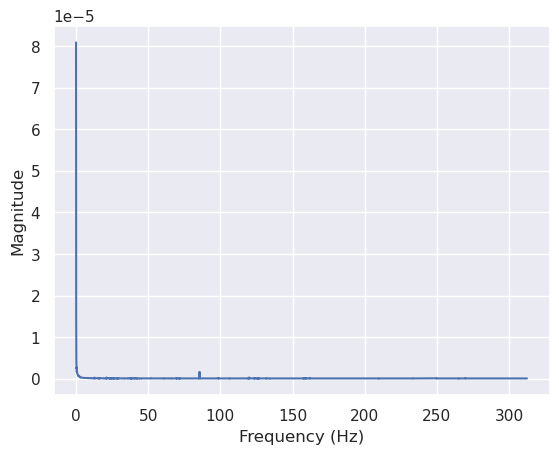

In [4]:
das.fft()

Signal updated with band-pass filter.


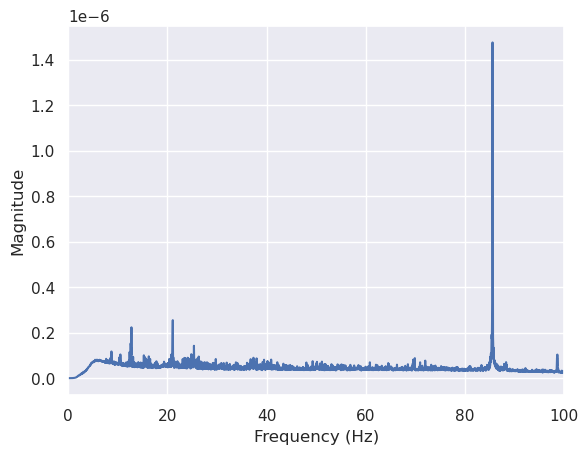

In [6]:
das.reset()
das.bandpass_filter(5, 100)
das.fft(xlim=100)

In [12]:
start_time = time.time()
das.bandpass_filter(15, 25)
time_bandpass = time.time()
print(f'time_bandpass: {time_bandpass - start_time}')

Signal updated with band-pass filter.


time_bandpass: 3.108389139175415


vmin: -2.18e-10, vmax: 2.18e-10


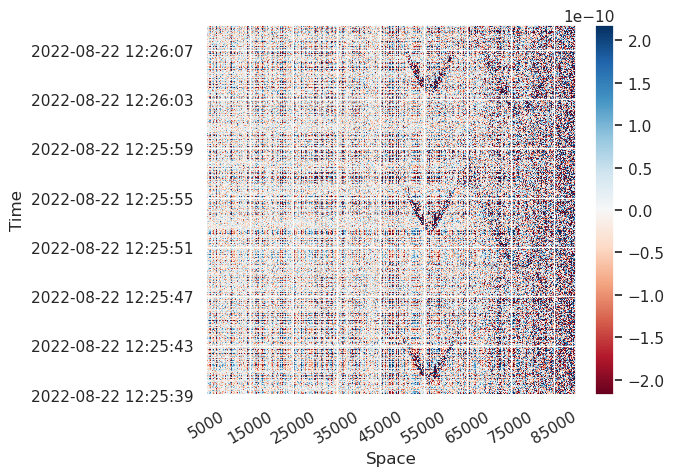

In [13]:
das.heatmap(xticks_rotate=30)

In [6]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')

das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')


das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
time_gauss = time.time()
print(f'time_gauss: {time_gauss - time_sample}')


das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_gauss}')

das.binary_transform(threshold=2.1e-11)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')

time_abs: 0.6867303848266602


Signal updated with new temporal sampling rate 2e+01 and new spatial sampling rate 0.01.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2.1e-11.


time_sample: 3.0289785861968994
time_gauss: 0.014442682266235352
time_sobel: 0.019525766372680664
time_binary: 0.0030603408813476562


19 lines are detected.


time_hough: 80.01681065559387
time_dbscan: 0.119659423828125


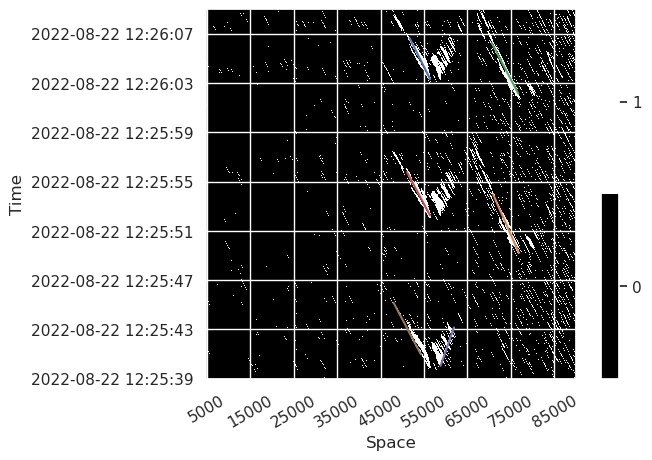

In [10]:
das.hough_transform(
    target_speed=(1500+1500.01)/2,
    speed_res=10,
    length_meters=4000,
    threshold_percent=0.8,
    max_line_gap_percent=0.1,
    speed_unit='m/s',    
)
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')

das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')

das.heatmap(xticks_rotate=30)

In [9]:
das.lines

In [9]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-4581.818182,-1272.727273,-5600.0,4.40,74100.0,2022-08-22 12:29:08.440,68500.0,2022-08-22 12:29:12.840,89900.000000,2022-08-22 12:28:56.025714286,...,691.0,736.0,635.0,846.0,849.000000,425.642857,557.109091,999.000000,2093.321429,425.642857
1,-5155.339806,-1432.038835,-5900.0,4.12,76100.0,2022-08-22 12:28:56.440,70200.0,2022-08-22 12:29:00.560,89900.000000,2022-08-22 12:28:46.803389831,...,711.0,436.0,652.0,539.0,849.000000,195.084746,388.504854,999.000000,1677.237288,195.084746
2,-5294.117647,-1470.588235,-5000.0,3.40,56500.0,2022-08-22 12:29:03.480,51500.0,2022-08-22 12:29:06.880,89900.000000,2022-08-22 12:28:40.768000000,...,515.0,612.0,465.0,697.0,849.000000,44.200000,287.352941,999.000000,1487.500000,44.200000
3,-5379.310345,-1494.252874,-5200.0,3.48,56400.0,2022-08-22 12:28:51.040,51200.0,2022-08-22 12:28:54.520,74390.804598,2022-08-22 12:28:39.000000000,...,514.0,301.0,462.0,388.0,693.908046,0.000000,96.804598,999.000000,1160.961538,-259.480769
4,-5931.818182,-1647.727273,-5800.0,3.52,56800.0,2022-08-22 12:28:39.040,51000.0,2022-08-22 12:28:42.560,56865.909091,2022-08-22 12:28:39.000000000,...,518.0,1.0,460.0,89.0,518.659091,0.000000,0.000000,786.931034,786.931034,-501.206897


In [8]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-1.395349e+03,-387.596899,-2000.0,5.16,77400.0,2022-08-22 12:29:04.480,75400.0,2022-08-22 12:29:09.640,87275.968992,2022-08-22 12:28:39.000000000,...,724.0,637.0,704.0,766.0,822.759690,0.000000,667.875969,999.000000,5306.800000,-169.250000
1,-5.578512e+03,-1549.586777,-7500.0,4.84,56700.0,2022-08-22 12:29:03.480,49200.0,2022-08-22 12:29:08.320,89900.000000,2022-08-22 12:28:42.054933333,...,517.0,612.0,442.0,733.0,849.000000,76.373333,277.123967,999.000000,1446.093333,76.373333
2,1.818000e+06,505000.000000,20200.0,0.04,20200.0,2022-08-22 12:28:39.840,40400.0,2022-08-22 12:28:39.880,5000.000000,2022-08-22 12:28:39.809900990,...,152.0,21.0,354.0,22.0,0.000000,20.247525,849.000000,24.450495,20.247525,24.450495
3,1.609091e+04,4469.696970,5900.0,1.32,76500.0,2022-08-22 12:28:39.720,82400.0,2022-08-22 12:28:41.040,73281.818182,2022-08-22 12:28:39.000000000,...,715.0,18.0,774.0,51.0,682.818182,0.000000,849.000000,92.949153,-381.915254,92.949153
4,4.945055e+01,13.736264,100.0,7.28,89500.0,2022-08-22 12:29:01.400,89600.0,2022-08-22 12:29:08.680,89192.307692,2022-08-22 12:28:39.000000000,...,845.0,560.0,846.0,742.0,841.923077,0.000000,847.412088,999.000000,-153230.000000,1288.000000
5,-5.373134e+02,-149.253731,-400.0,2.68,55300.0,2022-08-22 12:28:39.280,54900.0,2022-08-22 12:28:41.960,55341.791045,2022-08-22 12:28:39.000000000,...,503.0,7.0,499.0,74.0,503.417910,0.000000,443.776119,999.000000,8432.250000,-5788.500000
6,-6.057692e+02,-168.269231,-700.0,4.16,89800.0,2022-08-22 12:28:41.800,89100.0,2022-08-22 12:28:45.960,89900.000000,2022-08-22 12:28:41.205714286,...,848.0,70.0,841.0,174.0,849.000000,55.142857,785.471154,999.000000,12668.857143,55.142857
7,6.338028e+01,17.605634,100.0,5.68,88000.0,2022-08-22 12:28:57.000,88100.0,2022-08-22 12:29:02.680,87683.098592,2022-08-22 12:28:39.000000000,...,830.0,450.0,831.0,592.0,826.830986,0.000000,833.866197,999.000000,-117410.000000,3148.000000
8,-2.410714e+02,-66.964286,-300.0,4.48,87100.0,2022-08-22 12:29:06.680,86800.0,2022-08-22 12:29:11.160,88953.571429,2022-08-22 12:28:39.000000000,...,821.0,692.0,818.0,804.0,839.535714,0.000000,812.776786,999.000000,31342.666667,-353.333333
9,-6.300000e+02,-175.000000,-700.0,4.00,86900.0,2022-08-22 12:29:02.400,86200.0,2022-08-22 12:29:06.400,89900.000000,2022-08-22 12:28:45.257142857,...,819.0,585.0,812.0,685.0,849.000000,156.428571,790.020000,999.000000,12285.000000,156.428571
